In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv("/content/auto-mpg.csv")

#1.Top 5 Similar cars to toyota corona mark ii

In [ ]:
data_clean = data[data['horsepower'] != '?'].copy()
data_clean['horsepower'] = data_clean['horsepower'].astype(float)

In [ ]:
features = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(data_clean[features])

In [ ]:
target_index = data_clean[data_clean['car name'].str.contains("toyota corona mark ii", case=False)].index[0]
target_vector = X[target_index].reshape(1, -1)

In [ ]:
similarities = cosine_similarity(target_vector, X).flatten()

In [ ]:
data_clean['similarity'] = similarities

In [ ]:
top_5_similar = data_clean.drop(index=target_index).sort_values(by='similarity', ascending=False).head(5)

In [ ]:
print(top_5_similar[['car name', 'similarity']])

                       car name  similarity
21                  audi 100 ls    0.994044
18                 datsun pl510    0.975628
82  toyouta corona mark ii (sw)    0.974871
31                toyota corona    0.972406
57        toyota corona hardtop    0.970886


#2.Find completely unique/orthogonal car to toyota corona mark ii

In [ ]:
target_index = data_clean[data_clean['car name'].str.contains("toyota corona mark ii", case=False)].index[0]
target_vector = X[target_index].reshape(1, -1)

In [ ]:
similarities = cosine_similarity(target_vector, X).flatten()

In [ ]:
most_orthogonal_index = np.argmin(similarities)
most_orthogonal_car = data_clean.iloc[most_orthogonal_index]

In [ ]:
print("Most orthogonal car:")
print(most_orthogonal_car[['car name']])
print("Similarity score:", similarities[most_orthogonal_index])

Most orthogonal car:
car name    buick century
Name: 363, dtype: object
Similarity score: -0.9602997655094327


#3.Project the data to a 2-dimentional space and visualize using scatter plot

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
target_index = data_clean[data_clean['car name'].str.contains("toyota corona mark ii", case=False)].index[0]

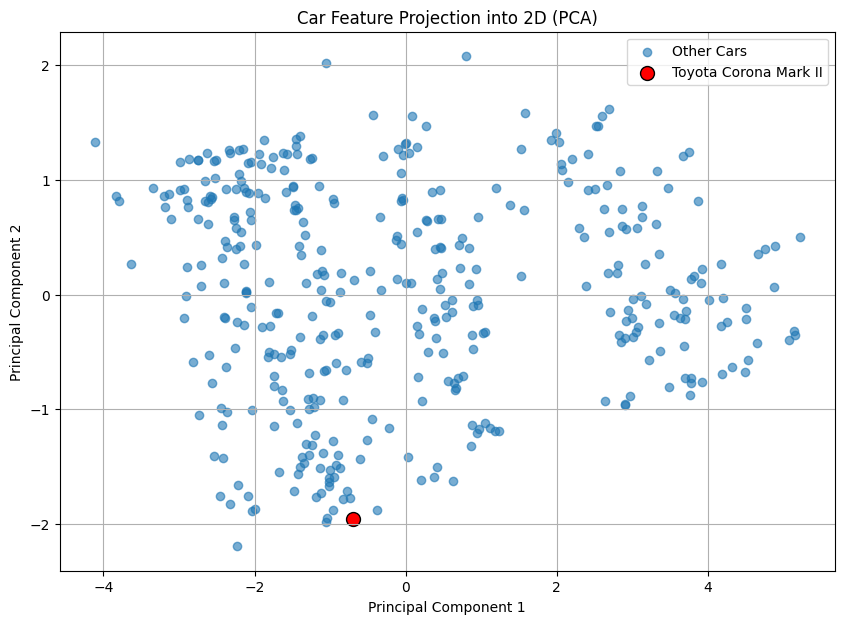

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_2d[:, 0], X_2d[:, 1], alpha=0.6, label="Other Cars")
plt.scatter(X_2d[target_index, 0], X_2d[target_index, 1], color='red', label="Toyota Corona Mark II", s=100, edgecolors='k')
plt.title("Car Feature Projection into 2D (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

#4.Write a function that returns dot product of two list of numbers

In [ ]:
def dot_pro(l1, l2):
    if len(l1) != len(l2):
        raise ValueError("Lists must be of the same length.")
    return sum(a * b for a, b in zip(l1, l2))

#5.Write a function that returns the projection of vector a onto vector b. Both a and b are given as list of numbers

In [ ]:
def projection(a, b):
    if len(a) != len(b):
        raise ValueError("Vectors a and b must be of the same length.")
    dot_ab = sum(ai * bi for ai, bi in zip(a, b))
    dot_bb = sum(bi * bi for bi in b)
    if dot_bb == 0:
        raise ValueError("Cannot project onto the zero vector.")
    scalar = dot_ab / dot_bb
    return [scalar * bi for bi in b]

#6.Create a class Vector that supports addition, dot product, and magnitude.

In [ ]:
class Vector:
    def __init__(self, c): self.c = c
    def __add__(self, o): return Vector([a + b for a, b in zip(self.c, o.c)])
    def dot(self, o): return sum(a * b for a, b in zip(self.c, o.c))
    def magnitude(self): return sum(a * a for a in self.c) ** 0.5
    def __repr__(self): return f"Vector({self.c})"

#7.Write a function that returns the L1 and L2 norms of a vector given as list

In [33]:
def norms(v):
    l1 = sum(abs(x) for x in v)
    l2 = sum(x * x for x in v) ** 0.5
    return l1, l2